In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost", username= "root", password = "Kdpms@171", database = "ecommerce")
cur = db.cursor()

# Calculate the number of orders per month in 2018.

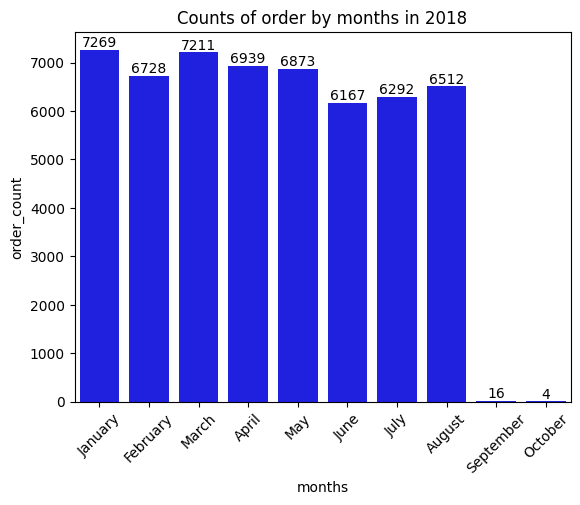

In [8]:
query5 = """select monthname(order_purchase_timestamp) as monthie, count(order_id) from orders where year(order_purchase_timestamp) = 2018 group by monthie"""
cur.execute(query5)
data5 = cur.fetchall()
df5 = pd.DataFrame(data5, columns = ["months", "order_count"])
month_name = ["January", "February","March","April","May","June","July","August","September","October"]
bar = sns.barplot(x=df5["months"], y=df5["order_count"], data=df5, order=month_name, color = "blue")
plt.xticks(rotation = 45)
bar.bar_label(bar.containers[0])
plt.title("Counts of order by months in 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [ ]:
query6 = """with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as order_count FROM ecommerce.orders join ecommerce.order_items on orders.order_id = order_items.order_id group by orders.order_id, orders.customer_id)
select customers.customer_city, round(avg(count_per_order.order_count), 2) as average_order from ecommerce.customers join count_per_order on customers.customer_id = count_per_order.customer_id group by customers.customer_city order by average_order desc;"""

cur.execute(query6)
data6 = cur.fetchall()
df6 = pd.DataFrame(data6, columns = ["customer_city", "average_order"])
df6.head()

# Calculate the percentage of total revenue contributed by each product category.

In [ ]:
query7 = """select upper(products.product_category) category, round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100, 2) sales from products join order_items on products.product_id = order_items.product_id join payments on payments.order_id = order_items.order_id group by category order by sales desc"""
cur.execute(query7)
data7 = cur.fetchall()
df7 = pd.DataFrame(data7, columns = ["Category", "Percentage distribution"])
df7.head()

# Identify the correlation between product price and the number of times a product has been purchased.

In [ ]:
query8 = """select products.product_category, count(order_items.product_id), round(avg(order_items.price),2) from products 
join order_items on order_items.product_id = products.product_id 
group by products.product_category"""
cur.execute(query8)
data8 = cur.fetchall()
df8 = pd.DataFrame(data8, columns = ["Category","order_count", "price"])
arr1 = df8["order_count"]
arr2 = df8["price"]

a = np.corrcoef([arr1, arr2])
print("correlation: ", a[0][-1])

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [ ]:
query9 = """select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value) revenue from order_items 
join payments on payments.order_id = order_items.order_id 
group by order_items.seller_id) as a"""
cur.execute(query9)
data9 = cur.fetchall()
df9 = pd.DataFrame(data9, columns = ["seller_id", "revenue", "rank"])
df9 = df9.head()
sns.barplot(x = "seller_id", y = "revenue", data=df9)
plt.xticks(rotation = 90)
plt.show()